```
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../../Datasets/price.csv")
```
Yukarıda yer alan kodu kullanarak
1. Verinin içeriğine bakılması
2. Tarih Verisinin indis haline getirilmesi
3. frekansın iş günü haline getirilmesi
4. Bonds sütunu için grafik çizilmesi
5. Bonds Sütununu dikkate alarak `lags`,`shifted` değerlerinin hesaplanması
6. Bonds dikkate alarak yüzdelik değişimin hesaplanması 
işlemlerini gerçekleştirelim


In [21]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

In [22]:
price = pd.read_csv('../../Datasets/price.csv')
price.head(2)

,DATE,SP500,Bonds,Gold,Oil
0,2007-06-29,1503.35,402.15,648.5,70.47
1,2007-07-02,1519.43,402.96,650.5,71.11


In [23]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2469 non-null   object 
 1   SP500   2469 non-null   float64
 2   Bonds   2469 non-null   float64
 3   Gold    2469 non-null   float64
 4   Oil     2469 non-null   float64
dtypes: float64(4), object(1)
memory usage: 96.6+ KB


In [24]:
price.DATE = pd.to_datetime(price.DATE)
price.set_index('DATE',inplace=True)

In [25]:
price.head(2)

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.5,70.47
2007-07-02,1519.43,402.96,650.5,71.11


In [26]:
price = price.asfreq('B')
price.info()price = price.asfreq('B')
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2607 entries, 2007-06-29 to 2017-06-26
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 101.8 KB


In [27]:
price.head(2)

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.5,70.47
2007-07-02,1519.43,402.96,650.5,71.11


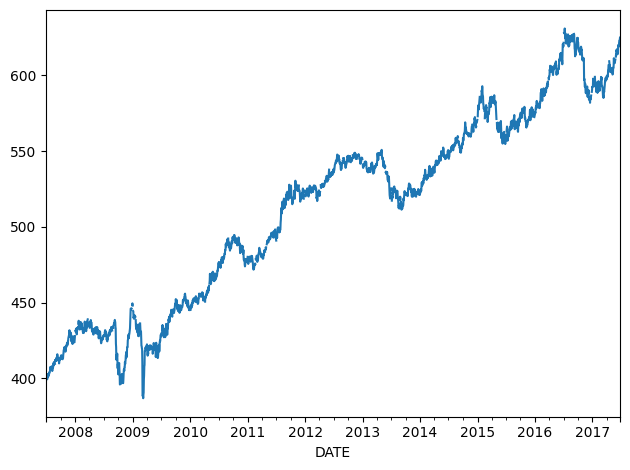

In [28]:
price.Bonds.plot()
plt.tight_layout()
plt.show()

In [29]:
price["shifted"] = price.Bonds.shift()
price.head()

,SP500,Bonds,Gold,Oil,shifted
DATE,,,,,
2007-06-29,1503.35,402.15,648.50,70.47,NaN
2007-07-02,1519.43,402.96,650.50,71.11,402.15
2007-07-03,1524.87,402.02,657.25,71.41,402.96
2007-07-04,NaN,NaN,NaN,NaN,402.02
2007-07-05,1525.40,400.15,655.90,71.81,NaN


In [30]:
price["lagged"] = price.Bonds.shift(periods=-1)
price.head(2)

,SP500,Bonds,Gold,Oil,shifted,lagged
DATE,,,,,,
2007-06-29,1503.35,402.15,648.5,70.47,NaN,402.96
2007-07-02,1519.43,402.96,650.5,71.11,402.15,402.02


In [31]:
price["pct_change"] = price.Bonds.pct_change().mul(100)
price.head(2)

/tmp/ipykernel_38701/2682727996.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price["pct_change"] = price.Bonds.pct_change().mul(100)


,SP500,Bonds,Gold,Oil,shifted,lagged,pct_change
DATE,,,,,,,
2007-06-29,1503.35,402.15,648.5,70.47,NaN,402.96,NaN
2007-07-02,1519.43,402.96,650.5,71.11,402.15,402.02,0.201417
